# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=f5fef1f9605ecd6e2609f7067204f6e5&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except KeyError:
        print(f"City {city} not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
                        
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | grand haven
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | pokhara
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | howrah
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | taiohae
City taiohae not found. Skipping...
Processing Record 14 of Set 1 | ciudad lazaro cardenas
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | callao
Processing Record 19 of Set 1 | kapa'a
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | stanley
Processing Record 22 of

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,28.56,81,100,6.95,MH,1726451505
1,arraial do cabo,-22.9661,-42.0278,21.70,92,0,5.12,BR,1726451506
2,bengkulu,-3.8004,102.2655,27.68,72,0,0.53,ID,1726451507
3,port-aux-francais,-49.3500,70.2167,2.74,79,100,14.69,TF,1726451508
4,waitangi,-43.9535,-176.5597,11.01,83,59,0.45,NZ,1726451455


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/nathalylamas/Downloads/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("/Users/nathalylamas/Downloads/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.56,81,100,6.95,MH,1726451505
1,arraial do cabo,-22.9661,-42.0278,21.70,92,0,5.12,BR,1726451506
2,bengkulu,-3.8004,102.2655,27.68,72,0,0.53,ID,1726451507
3,port-aux-francais,-49.3500,70.2167,2.74,79,100,14.69,TF,1726451508
4,waitangi,-43.9535,-176.5597,11.01,83,59,0.45,NZ,1726451455


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

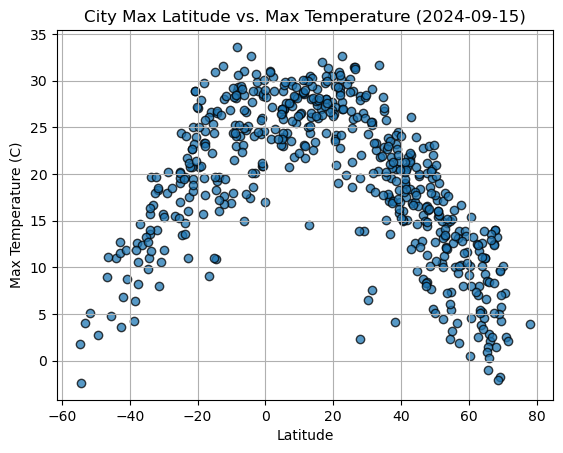

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/nathalylamas/Downloads/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

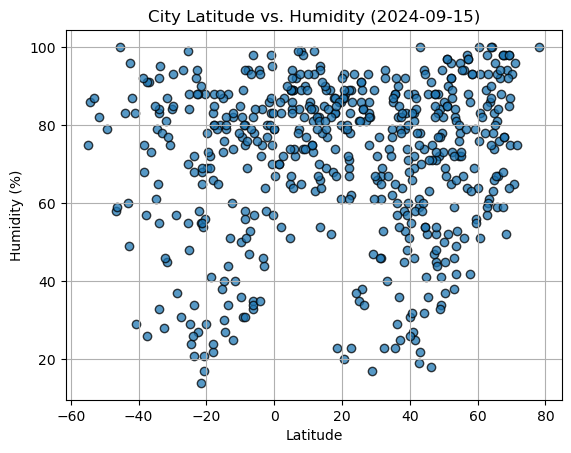

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/nathalylamas/Downloads/Starter_Code/output_data/Fig2.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

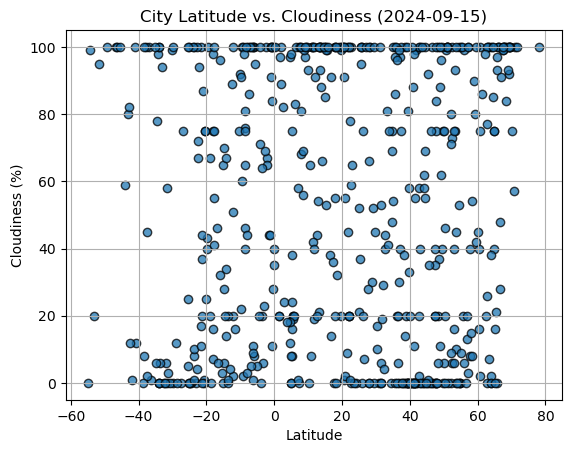

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/nathalylamas/Downloads/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

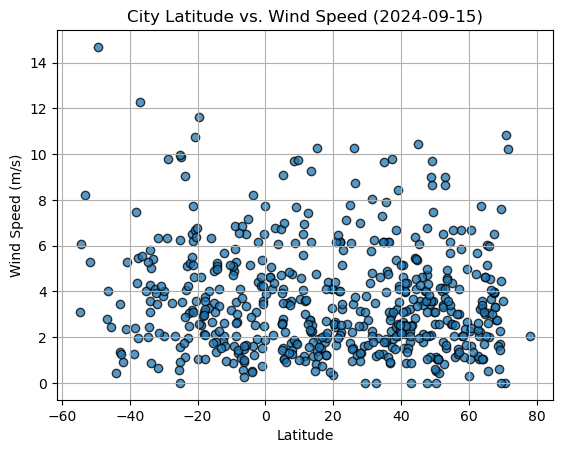

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-09-15)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/nathalylamas/Downloads/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept

    # Create regression equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Return the slope, intercept, r-value, and regression line
    return slope, intercept, rvalue, regress_values, line_eq


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.56,81,100,6.95,MH,1726451505
5,albany,42.6001,-73.9662,21.55,61,58,1.80,US,1726451416
6,grand haven,43.0631,-86.2284,22.03,78,40,0.00,US,1726451511
8,pokhara,28.2333,83.9833,22.03,82,100,1.31,NP,1726451484
10,howrah,22.5892,88.3103,27.00,89,100,5.14,IN,1726451516


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,21.70,92,0,5.12,BR,1726451506
2,bengkulu,-3.8004,102.2655,27.68,72,0,0.53,ID,1726451507
3,port-aux-francais,-49.3500,70.2167,2.74,79,100,14.69,TF,1726451508
4,waitangi,-43.9535,-176.5597,11.01,83,59,0.45,NZ,1726451455
7,blackmans bay,-43.0167,147.3167,11.52,60,80,1.34,AU,1726451513


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6921979508968538


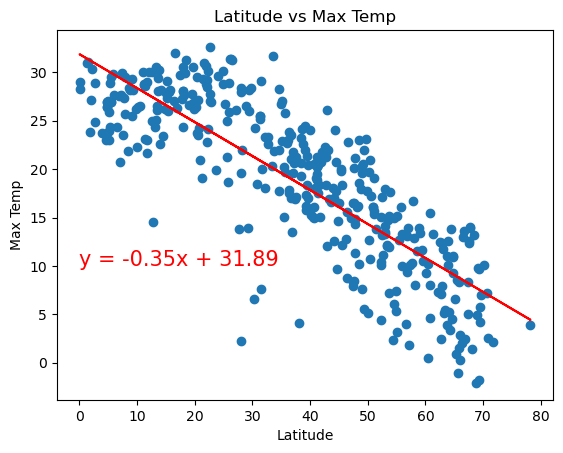

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (0, 10), fontsize=15, color="red")


plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.6056844153234358


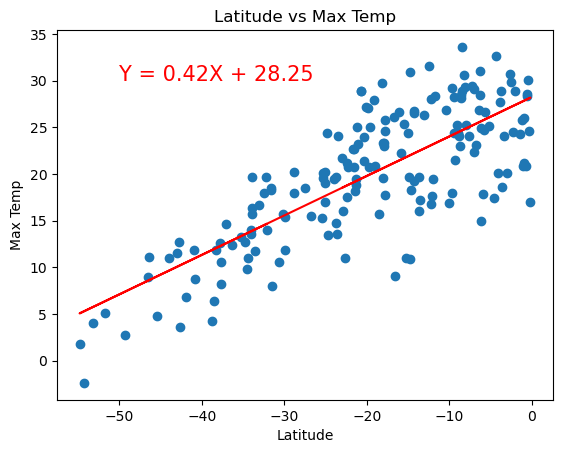

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (-50, 30), fontsize=15, color="red")

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
The linear regression indicates a negative correlation between latitude and max temperature in the Northern Hemisphere, with an R2 value of 0.69.Temperature tends to decrease when looking at the regression equation. In the Southern Hemisphere, the relationship is positive correlation meaning that when latitude decreases then temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0013246661376313436


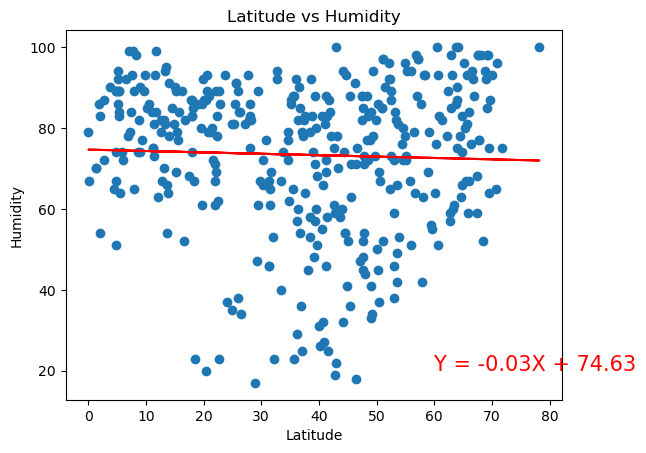

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (60, 20), fontsize=15, color="red")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r^2-value is: {rvalue**2}")


plt.show()

The r^2-value is: 0.0010717798488168453


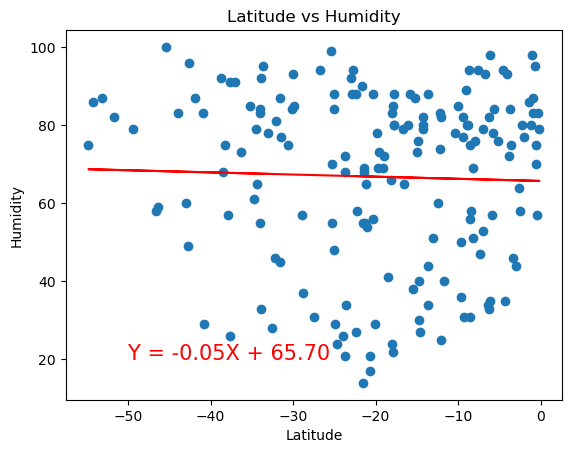

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (-50, 20), fontsize=15, color="red")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The relationship between these two graphs indicates a weak correlation, meaning that latitude may not be a strong predictor of humidity, it is both negative but I believe there may be other factors that could affect humidity other than latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 4.018593978366623e-05


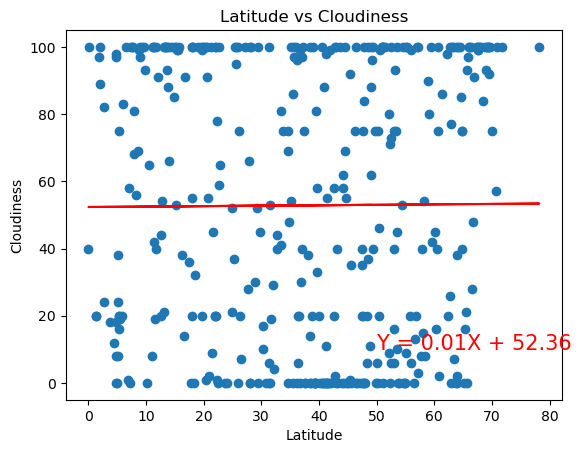

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (50, 10), fontsize=15, color="red")


plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.0033037811787353316


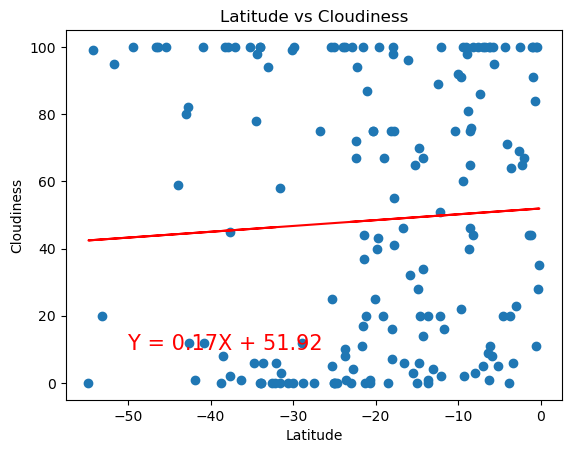

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (-50, 10), fontsize=15, color="red")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Both graph have weaker correlation, it indicates that latitude doesn't have strong impact on cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0022134965620935446


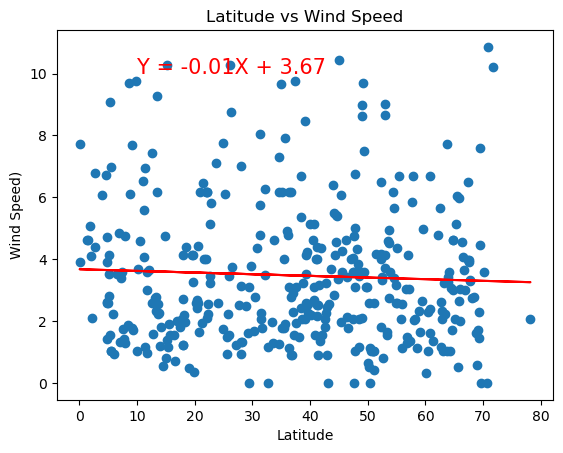

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (10, 10), fontsize=15, color="red")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed)")

print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.029463274916535984


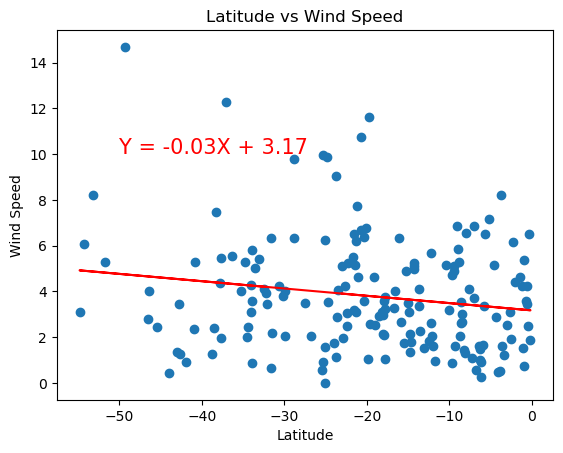

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")

plt.annotate(f"Y = {slope:.2f}X + {intercept:.2f}", (-50, 10), fontsize=15, color="red")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression for wind speed vs latitude indicates almost no correlation, which means that latitude has no impact on the wind speed. While Souther shows a slightly negative slope but the relations still shows weak. 